# K Nearest Neighbors

### I am working in a Data set from a company! They've hidden the feature column names but they given the data and the target classes.

### I have tried to use KNN to create a model that directly predicts a class for a new data point based off of the features.

In [1]:
# Checking whether the files are in the same folder or not
import os
print(os.listdir())

In [2]:
# importing essential libraries which we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# To get the graphs inline
%matplotlib inline

In [3]:
# Loading the dataSet into my DataFrame
dataSet = pd.read_csv('Classified Data.csv', index_col = 0)

In [4]:
#checking the dataSet
dataSet.head(10)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
5,0.833928,1.523302,1.104743,1.021139,1.107377,1.010930,1.279538,1.280677,0.510350,1.528044,0
6,0.944705,1.251761,1.074885,0.286473,0.996440,0.428860,0.910805,0.755305,1.111800,1.110842,0
7,0.816174,1.088392,0.895343,0.243860,0.943123,1.045131,1.146536,1.341886,1.225324,1.425784,0
8,0.776551,1.463812,0.783825,0.337278,0.742215,1.072756,0.880300,1.312951,1.118165,1.225922,0
9,0.772280,0.515111,0.891596,0.940862,1.430568,0.885876,1.205231,0.596858,1.542580,0.981879,1


# Standardize the Variables

The KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  #creating the instance

In [6]:
# Fitting the dataSet by dropping the Target class
scaler.fit(dataSet.drop('TARGET CLASS', axis = 1)) #Only the features are taken into consideration

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
#Transforming the data
scaled_features = scaler.transform(dataSet.drop('TARGET CLASS',axis=1))

In [8]:
#Recreating the featured DataFrame
df_feat = pd.DataFrame(scaled_features,columns=dataSet.columns[:-1]) # The data is scaled_feature
# Ckecking the Standardized data
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


# Splitting the dataSet into Train and Test Data using the Standardized Data

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,dataSet['TARGET CLASS'], test_size=0.30)

# Using KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)  #Taking K = 1

In [11]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [12]:
pred = knn.predict(X_test)

# Predictions and Evaluations
Let's evaluate our KNN model!

In [13]:
from sklearn.metrics import classification_report,confusion_matrix

In [14]:
print(confusion_matrix(y_test,pred))

[[137  10]
 [ 16 137]]


In [15]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       147
           1       0.93      0.90      0.91       153

   micro avg       0.91      0.91      0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value:

In [16]:
error_rate = []

# Will take some time
for i in range(1,100, 2):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [17]:
error_index = error_rate.index(min(error_rate))
print(error_index)

45


Text(0, 0.5, 'Error Rate')

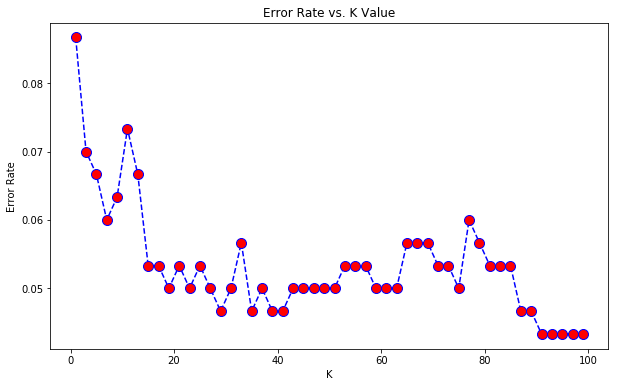

In [18]:
plt.figure(figsize=(10,6)) #Setting the Size of the Graph
plt.plot(range(1,100, 2),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [19]:
print("The minimum error rate is {}.".format(min(error_rate)))
print("The index with Minimum error rate is {}.".format(error_rate.index(min(error_rate))))

The minimum error rate is 0.043333333333333335.
The index with Minimum error rate is 45.


In [20]:
knn = KNeighborsClassifier(n_neighbors=error_index)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K={}'.format(error_index))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=45


[[138   9]
 [  6 147]]


              precision    recall  f1-score   support

           0       0.96      0.94      0.95       147
           1       0.94      0.96      0.95       153

   micro avg       0.95      0.95      0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

